<a href="https://colab.research.google.com/github/rahuljungbahadur/hands_on_ml_book/blob/main/fashionMNIST_transferLearning_Sequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning for FashionMNIST 

Creating a Fashion MNIST model using `keras.models.Sequential`

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Splitting the dataset

Split the data so that the `main` part has all but 2 labels. The `tl` part would be used for transfer learning and would have the remaining 2 classes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Let's set classes 8 and 9 for `transfer learning`

In [5]:
## Building the main train data subset

main_choices = np.logical_not(np.isin(y_train, [6,7]))
X_train_main = X_train[main_choices]
y_train_main = y_train[main_choices]

In [6]:
X_train_main.shape

(48000, 28, 28)

In [7]:
y_train_main.shape

(48000,)

In [8]:
## main validation subset
main_valid_choices = np.logical_not(np.isin(y_test, [6,7]))
X_test_main = X_test[main_valid_choices]
y_test_main = y_test[main_valid_choices]

In [9]:
## transfer-learning training data subset 
tl_train_choices = np.isin(y_train, [6,7])
X_train_tl = X_train[tl_train_choices]
y_train_tl = y_train[tl_train_choices]

In [10]:
## transfer-learning validation data subset
tl_valid_choices = np.isin(y_test, [6,7])
X_test_tl = X_test[tl_valid_choices]
y_test_tl = y_test[tl_valid_choices]

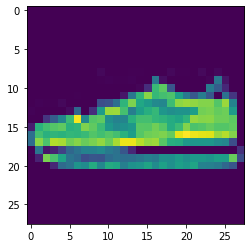

In [13]:
## Testing sample
plt.imshow(X_train_tl[8])

In [16]:
np.unique(y_train_tl)

array([0, 1])

In [15]:
y_train_tl = np.where(y_train_tl==6, 0, 1)


In [19]:
y_test_tl = np.where(y_test_tl==6, 0, 1)

In [24]:
np.unique(y_train_main)  ## Convert 8 and 9 to 6 and 7

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8)

In [23]:
y_train_main=np.where(y_train_main>6, y_train_main-2, y_train_main)
y_test_main = np.where(y_test_main>6, y_test_main-2, y_test_main)

## Create Sequential model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.activations import elu, softmax

In [37]:
from tensorflow.python.keras import activations
## model

main_model = Sequential()

main_model.add(Input(shape=[28, 28]))
## Flatten it
main_model.add(Flatten())

## batchNormalize
main_model.add(BatchNormalization())

## Hidden1

main_model.add(Dense(500, activation=elu, kernel_initializer='he_normal', use_bias=False))

## BN2

main_model.add(BatchNormalization())

##hidden2
main_model.add(Dense(300, activation=elu, kernel_initializer='he_normal', use_bias=False))

##BN3
main_model.add(BatchNormalization())

## Hidden3
main_model.add(Dense(100, activation=elu, kernel_initializer='he_normal', use_bias=False))

##BN4
main_model.add(BatchNormalization())

## Hidden4
main_model.add(Dense(50, activation=elu, kernel_initializer='he_normal', use_bias=False))

## Hidden5
main_model.add(Dense(8, activation=softmax))

In [38]:
main_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
main_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_9 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 500)               392000    
                                                                 
 batch_normalization_10 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 300)               150000    
                                                                 
 batch_normalization_11 (Bat  (None, 300)             

In [28]:
## Modify y to be categorical

from tensorflow.keras.utils import to_categorical

In [29]:
y_train_main = to_categorical(y_train_main, num_classes=8)
y_test_main = to_categorical(y_test_main, num_classes=8)

In [30]:
early_stop = EarlyStopping(patience=2)
model_cp = ModelCheckpoint(filepath='/saved_models/FashionMNISTSeq.h5', save_best_only=True)

In [40]:
main_model.fit(x=X_train_main, y=y_train_main, batch_size=32, epochs=15, callbacks=[early_stop, model_cp], validation_data=(X_test_main, y_test_main))

Epoch 1/15
1500/1500 [==============================] - 29s 18ms/step - loss: 0.3088 - accuracy: 0.8918 - val_loss: 0.2601 - val_accuracy: 0.9118
Epoch 2/15
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2291 - accuracy: 0.9189 - val_loss: 0.2277 - val_accuracy: 0.9194
Epoch 3/15
1500/1500 [==============================] - 28s 19ms/step - loss: 0.2046 - accuracy: 0.9273 - val_loss: 0.2184 - val_accuracy: 0.9274
Epoch 4/15
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1818 - accuracy: 0.9349 - val_loss: 0.2350 - val_accuracy: 0.9241
Epoch 5/15
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1672 - accuracy: 0.9401 - val_loss: 0.2307 - val_accuracy: 0.9221


## Model evaluation


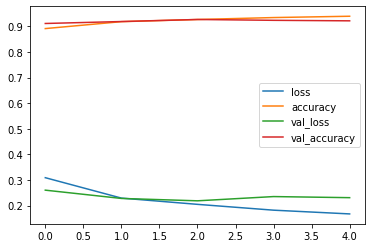

In [43]:
pd.DataFrame(main_model.history.history).plot(kind='line')

In [42]:
main_model.layers

## Create tl_model

This `transfer-learning` model would be using the n-1 layers of the `main-model`


In [47]:
tl_model = Sequential(main_model.layers[:-1])

In [48]:
tl_model.layers

The main model needs to be cloned as making and modifying a copy of it also changes the source model

In [49]:
from tensorflow.keras.models import clone_model

In [51]:
# from tensorflow.python.keras.models import clone_model
main_model_clone = clone_model(main_model)
main_model_clone.set_weights(main_model.get_weights())

In [56]:
# main_model.get_weights()[-3].shape

(100, 50)

In [57]:
## Add the last layer for tl-model
tl_model.add(Dense(units=1, activation='sigmoid'))

In [59]:
for layer in tl_model.layers:
  layer.trainable=False


In [ ]:
tl_model.